In [1]:
import pandas as pd
import scipy.stats as stats
import os
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib 
import math
import pickle

## Comparing privacy averages for same data set

In [2]:
current_path = "solutions\\cabspotting_10112023"
#current_path = "solutions\\privamov_27072023"
file_case_RF="RF_0_20000"
file_case_WC="WC_0_20000"
file_case_FLAIR="FLAIR_0_20000"


### Gain over real privacy


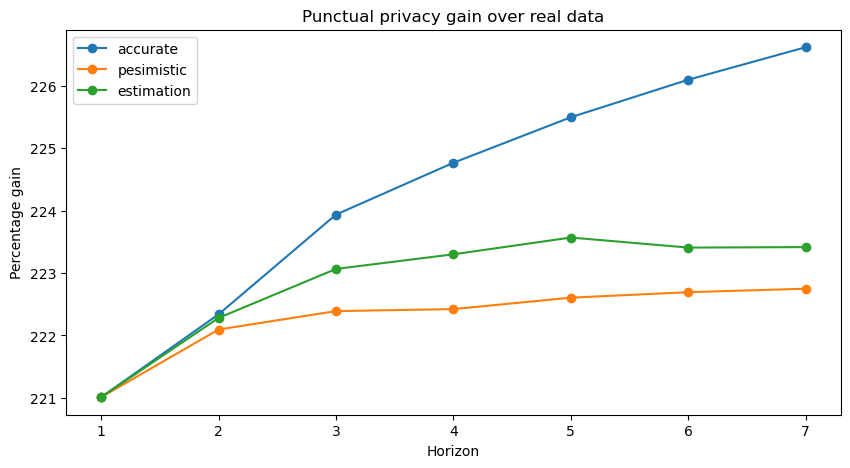

In [3]:
RF_real=np.loadtxt(current_path + '\\'+file_case_RF+'\\gain_h_real.txt')
WC_real=np.loadtxt(current_path + '\\'+file_case_WC+'\\gain_h_real.txt')
Flair_real=np.loadtxt(current_path + '\\'+file_case_FLAIR+'\\gain_h_real.txt')

horizons = pd.read_csv(current_path + '\\'+file_case_RF+'\\sol_oilrag\\horizons.csv') #assuming same horizons

plt.figure(figsize=(10, 5))
plt.title('Punctual privacy gain over real data')
plt.plot(horizons['0'],RF_real,'o-',label='accurate')
plt.plot(horizons['0'],WC_real,'o-',label='pesimistic')
plt.plot(horizons['0'],Flair_real,'o-',label='estimation')
plt.xlabel('Horizon')
plt.ylabel('Percentage gain')
plt.legend()
tikzplotlib.save(current_path + '\\comparison_real.tex')
plt.show()

### Gain over GeoI

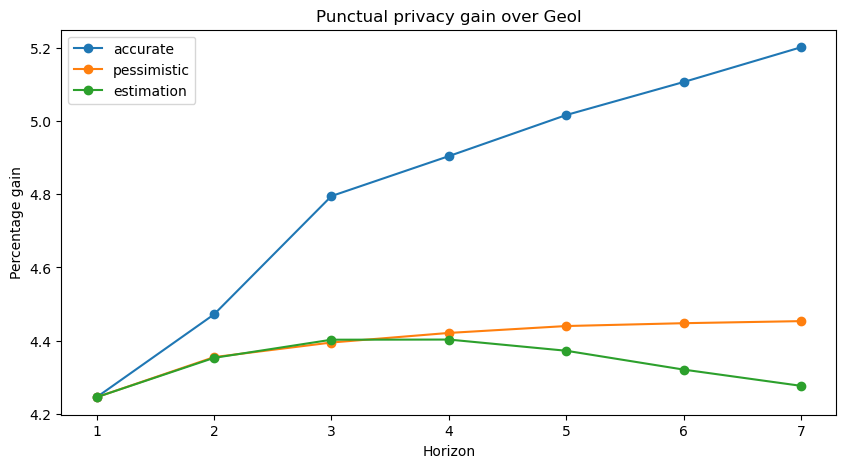

In [4]:
RF_GeoI=np.loadtxt(current_path + '\\'+file_case_RF+'\\gain_h_GeoI.txt')
WC_GeoI=np.loadtxt(current_path + '\\'+file_case_WC+'\\gain_h_GeoI.txt')
Flair_GeoI=np.loadtxt(current_path + '\\'+file_case_FLAIR+'\\gain_h_GeoI.txt')

plt.figure(figsize=(10, 5))
plt.title('Punctual privacy gain over GeoI')
plt.plot(horizons['0'],RF_GeoI,'o-',label='accurate')
plt.plot(horizons['0'],WC_GeoI,'o-',label='pessimistic')
plt.plot(horizons['0'],Flair_GeoI,'o-',label='estimation')
plt.xlabel('Horizon')
plt.ylabel('Percentage gain')
plt.legend()
tikzplotlib.save(current_path + '\\comparison_GeoI.tex')
plt.show()

### Runtime

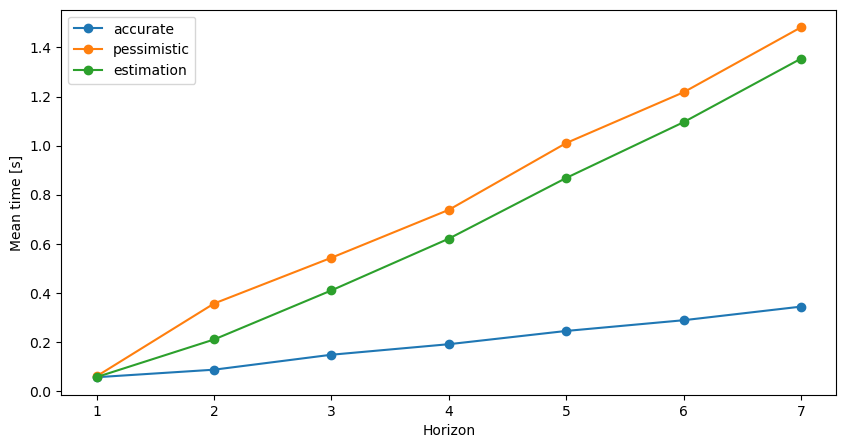

In [5]:
RF_GeoI=np.loadtxt(current_path + '\\'+file_case_RF+'\\time_h.txt')
WC_GeoI=np.loadtxt(current_path + '\\'+file_case_WC+'\\time_h.txt')
Flair_GeoI=np.loadtxt(current_path + '\\'+file_case_FLAIR+'\\time_h.txt')

plt.figure(figsize=(10, 5))
#plt.title('Punctual privacy gain over GeoI')
plt.plot(horizons['0'],RF_GeoI,'o-',label='accurate')
plt.plot(horizons['0'],WC_GeoI,'o-',label='pessimistic')
plt.plot(horizons['0'],Flair_GeoI,'o-',label='estimation')
plt.xlabel('Horizon')
plt.ylabel('Mean time [s]')
plt.legend()
tikzplotlib.save(current_path + '\\comparison_time.tex')
plt.show()

In [6]:
Times_RF=pickle.load( open( current_path + '\\'+file_case_RF+'\\Run_times.pkl','rb') )
Times_WC=pickle.load( open( current_path + '\\'+file_case_WC+'\\Run_times.pkl','rb') )
Times_FLAIR=pickle.load( open( current_path + '\\'+file_case_FLAIR+'\\Run_times.pkl','rb') ) 


### Gain distribution over real


91


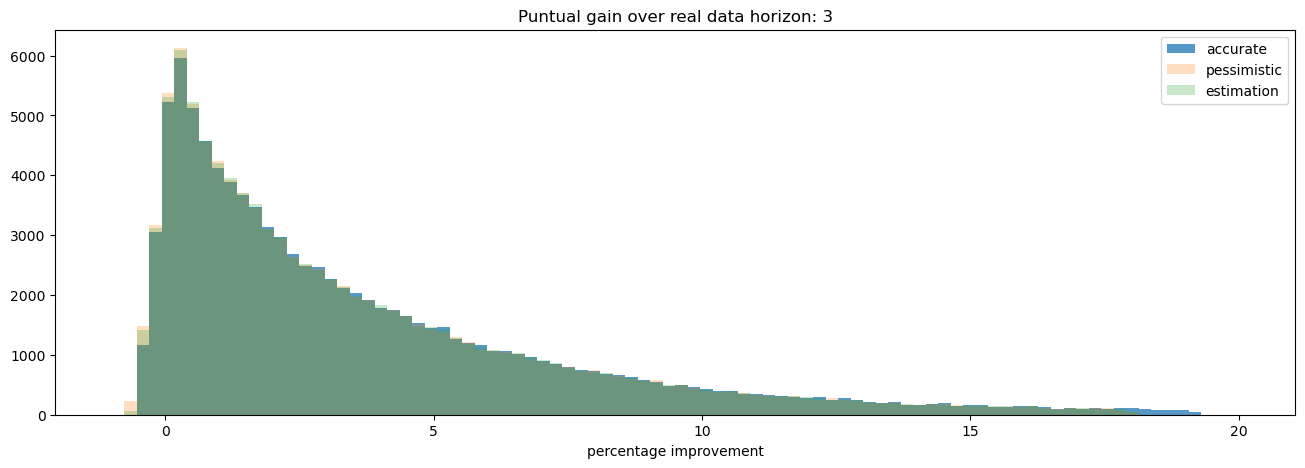

In [7]:
per_imp_total_RF=pd.read_csv(current_path + '\\'+file_case_RF+'\\punctual_gain_oreal.csv')
per_imp_total_WC=pd.read_csv(current_path + '\\'+file_case_WC+'\\punctual_gain_oreal.csv')
per_imp_total_FLAIR=pd.read_csv(current_path + '\\'+file_case_FLAIR+'\\punctual_gain_oreal.csv')

hor='3'
q_low_RF = per_imp_total_RF[hor].quantile(0.025)

q_hi_RF  = per_imp_total_RF[hor].quantile(0.825)

q_low_WC = per_imp_total_WC[hor].quantile(0.025)
q_hi_WC  = per_imp_total_WC[hor].quantile(0.825)

q_low_FLAIR = per_imp_total_FLAIR[hor].quantile(0.025)
q_hi_FLAIR  = per_imp_total_FLAIR[hor].quantile(0.825)
#Data to histogram
to_hist_RF=per_imp_total_RF[hor].loc[np.all([per_imp_total_RF[hor]>q_low_RF,per_imp_total_RF[hor]<q_hi_RF],axis=0)]
to_hist_WC=per_imp_total_WC[hor].loc[np.all([per_imp_total_WC[hor]>q_low_WC,per_imp_total_WC[hor]<q_hi_WC],axis=0)]
to_hist_FLAIR=per_imp_total_FLAIR[hor].loc[np.all([per_imp_total_FLAIR[hor]>q_low_FLAIR,per_imp_total_FLAIR[hor]<q_hi_FLAIR],axis=0)]

#Define bins
Nbins=int(2*len(to_hist_RF)**(1/3))
print(Nbins)
bins = np.linspace(np.floor(q_low_RF), np.ceil(q_hi_RF), Nbins)
step=bins[1]-bins[0]

#mean and std to set lognormal
q_low_RF=min([0,q_low_RF])
mean_RF=np.mean(to_hist_RF[to_hist_RF>q_low_RF]-q_low_RF)
std_RF=np.std(to_hist_RF[to_hist_RF>q_low_RF]-q_low_RF)
lRF=len(to_hist_RF[to_hist_RF>q_low_RF])
mean_WC=np.mean(to_hist_WC)
std_WC=np.std(to_hist_WC)
lWC=len(to_hist_WC)
mean_FLAIR=np.mean(to_hist_FLAIR)
std_FLAIR=np.std(to_hist_FLAIR)
lFLAIR=len(to_hist_FLAIR)
xb=np.linspace(q_low_RF,q_hi_RF,500)

fig = plt.figure(figsize=(16, 5))
plt.title('Puntual gain over real data horizon: '+str(hor))
plt.hist(to_hist_RF, bins, alpha=0.75, label='accurate',color='tab:blue')
#plt.plot(xb,lRF*step*stats.lognorm.pdf(xb,std_RF,loc=q_low_RF,scale=np.exp(mean_RF)),color='tab:blue',linewidth=2)
plt.hist(to_hist_WC, bins, alpha=0.25, label='pessimistic',color='tab:orange')
plt.hist(to_hist_FLAIR, bins, alpha=0.25, label='estimation',color='tab:green')
plt.xlabel('percentage improvement')
plt.legend()
tikzplotlib.save(current_path + '\\distribution_oreal.tex')
plt.show()


97


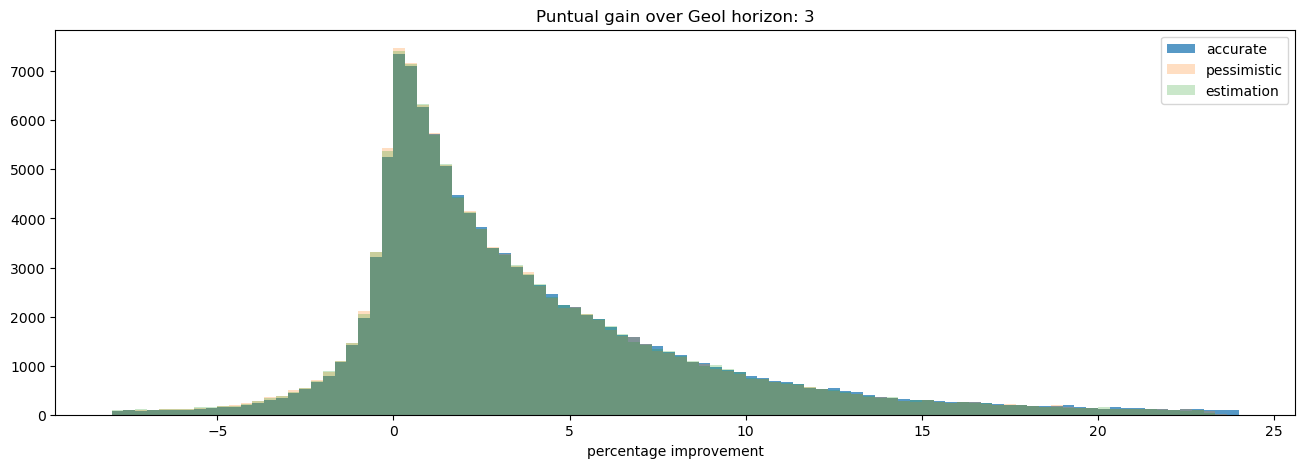

In [8]:
per_imp_total_RF=pd.read_csv(current_path + '\\'+file_case_RF+'\\punctual_gain_GeoI.csv')
per_imp_total_WC=pd.read_csv(current_path + '\\'+file_case_WC+'\\punctual_gain_GeoI.csv')
per_imp_total_FLAIR=pd.read_csv(current_path + '\\'+file_case_FLAIR+'\\punctual_gain_GeoI.csv')

hor='3'
q_low_RF = per_imp_total_RF[hor].quantile(0.01)
q_hi_RF  = per_imp_total_RF[hor].quantile(0.975)

q_low_WC = per_imp_total_WC[hor].quantile(0.01)
q_hi_WC  = per_imp_total_WC[hor].quantile(0.975)

q_low_FLAIR = per_imp_total_FLAIR[hor].quantile(0.01)
q_hi_FLAIR  = per_imp_total_FLAIR[hor].quantile(0.975)


to_hist_RF=per_imp_total_RF[hor].loc[np.all([per_imp_total_RF[hor]>q_low_RF,per_imp_total_RF[hor]<q_hi_RF],axis=0)]
to_hist_WC=per_imp_total_WC[hor].loc[np.all([per_imp_total_WC[hor]>q_low_WC,per_imp_total_WC[hor]<q_hi_WC],axis=0)]
to_hist_FLAIR=per_imp_total_FLAIR[hor].loc[np.all([per_imp_total_FLAIR[hor]>q_low_FLAIR,per_imp_total_FLAIR[hor]<q_hi_FLAIR],axis=0)]

Nbins=int(2*len(to_hist_RF)**(1/3))
print(Nbins)
bins = np.linspace(int(q_low_RF), int(q_hi_RF), Nbins)


#mean and std to set lognormal
q_low_RF=min([0,q_low_RF])
mean_RF=np.mean(to_hist_RF[to_hist_RF>q_low_RF]-q_low_RF)
std_RF=np.std(to_hist_RF[to_hist_RF>q_low_RF]-q_low_RF)
lRF=len(to_hist_RF[to_hist_RF>q_low_RF])
mean_WC=np.mean(to_hist_WC)
std_WC=np.std(to_hist_WC)
lWC=len(to_hist_WC)
mean_FLAIR=np.mean(to_hist_FLAIR)
std_FLAIR=np.std(to_hist_FLAIR)
lFLAIR=len(to_hist_FLAIR)
xb=np.linspace(q_low_RF,q_hi_RF,500)

fig = plt.figure(figsize=(16, 5))
plt.title('Puntual gain over GeoI horizon: '+str(hor))
plt.hist(to_hist_RF, bins, alpha=0.75, label='accurate',color='tab:blue')
#plt.plot(xb,lRF*step*stats.lognorm.pdf(xb,std_RF,loc=q_low_RF,scale=np.exp(mean_RF)),color='tab:blue',linewidth=2)
plt.hist(to_hist_WC, bins, alpha=0.25, label='pessimistic',color='tab:orange')
plt.hist(to_hist_FLAIR, bins, alpha=0.25, label='estimation',color='tab:green')
plt.xlabel('percentage improvement')
plt.legend()
tikzplotlib.save(current_path + '\\distribution_oGeoI.tex')
plt.show()
